In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma
from simulation_loop import simulate_many, SimulationParams, plot_result

In [16]:
N_ITERS = 100
N_ROBOTS = 2

# Case 1
Poisson distribution: Interarrival time of exponential distribution

Text(0.5, 1.0, 'Discharge Times Over Time')

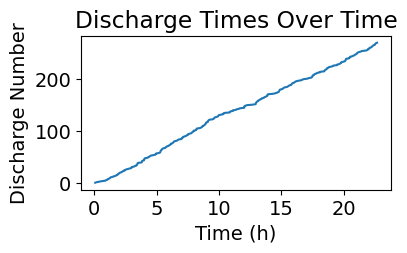

In [17]:
discharge_dist = lambda: np.cumsum(expon(scale=1/12).rvs(size=270))
plt.figure(figsize=(4, 2))
y_ = discharge_dist()
plt.plot(y_, np.arange(len(y_)), linestyle='-', label='Discharge Times')
plt.xlabel('Time (h)')
plt.ylabel('Discharge Number')
plt.title('Discharge Times Over Time')

100%|██████████| 100/100 [02:28<00:00,  1.48s/it]


       Bed Wash  Elevator 1
Dirty     38.04        6.00
Clean      1.00       15.02


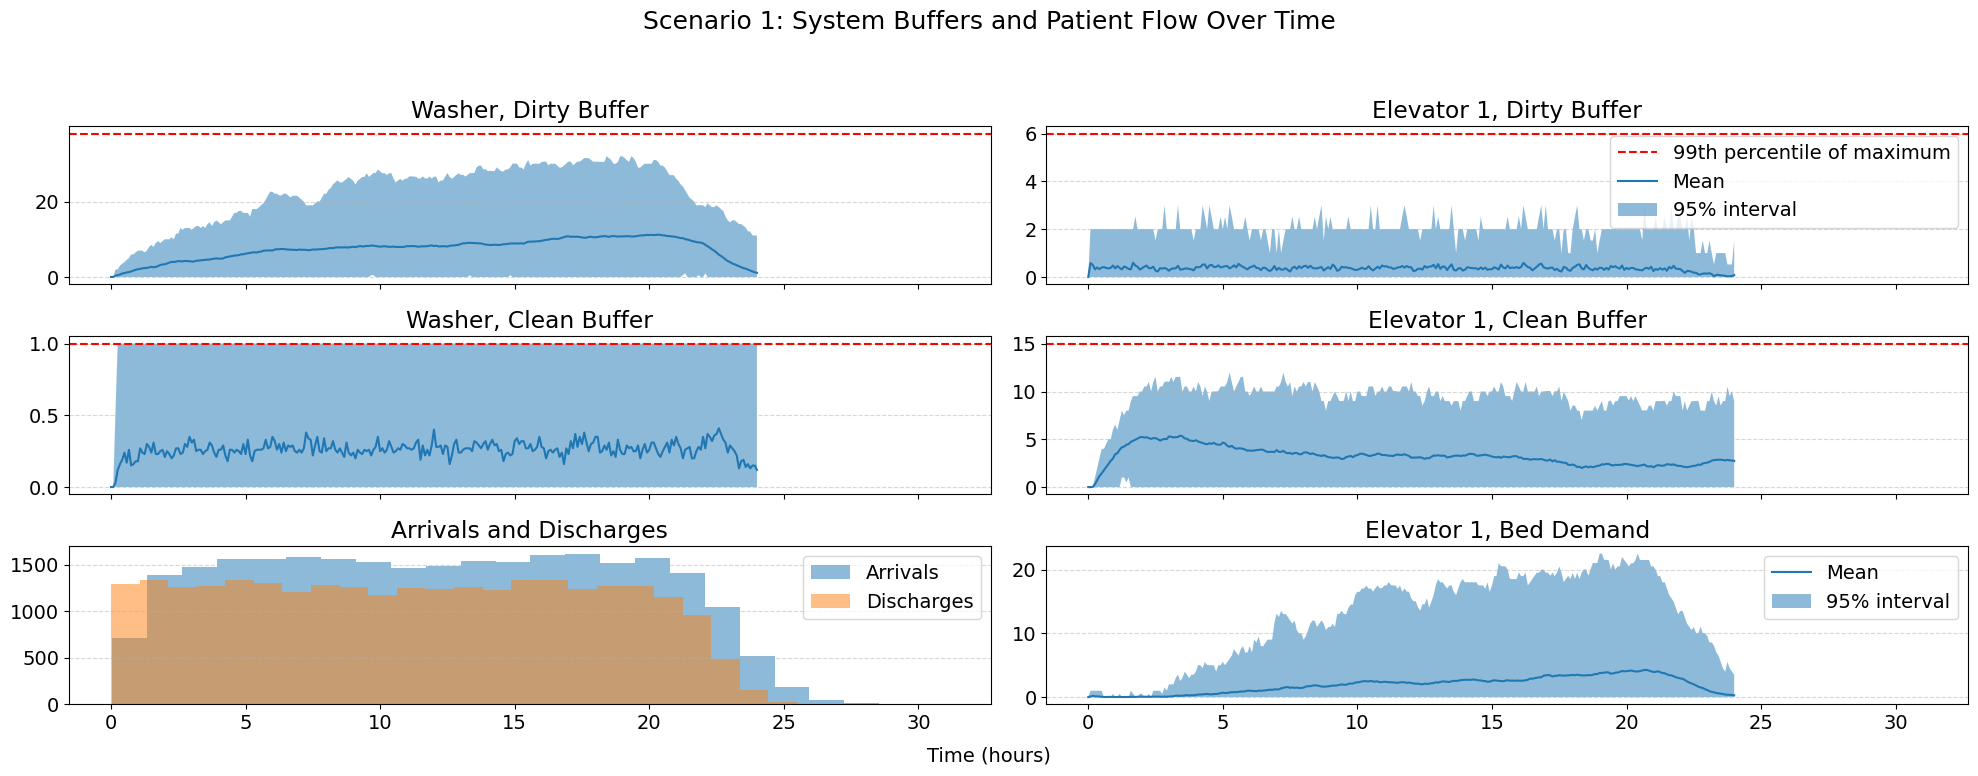

In [18]:
np.random.seed(42069)

def service_time_dist():
    service_min_time = 4/60  # 4 minutes in hours
    return service_min_time + expon(scale=1/60).rvs()


def transport_time_dist(distance_meters):
    if distance_meters == 0:
        return 0
    speed_meters_per_second = 1.4
    transport_time_seconds = gamma(a=distance_meters, scale=1/speed_meters_per_second).rvs()
    return transport_time_seconds / 3600

distances = np.array([
    [10, 175],
    [175, 10],
])

n_elevators = 1

params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.ones(n_elevators) / n_elevators,
    discharge_weights=np.ones(n_elevators) / n_elevators,
    n_elevators=n_elevators,
    n_robots=N_ROBOTS,
)

# events, data = simulate_system(params)
buffers, demands, arrival_times, discharge_times, df = simulate_many(params, n_iters=N_ITERS)
plot_result(params, buffers, demands, arrival_times, discharge_times, "scenario1", "Scenario 1")

# Case 2
Variable rate intensit for poisson arrival process

100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


       Bed Wash  Elevator 1
Dirty     28.03        8.00
Clean      1.00       14.01


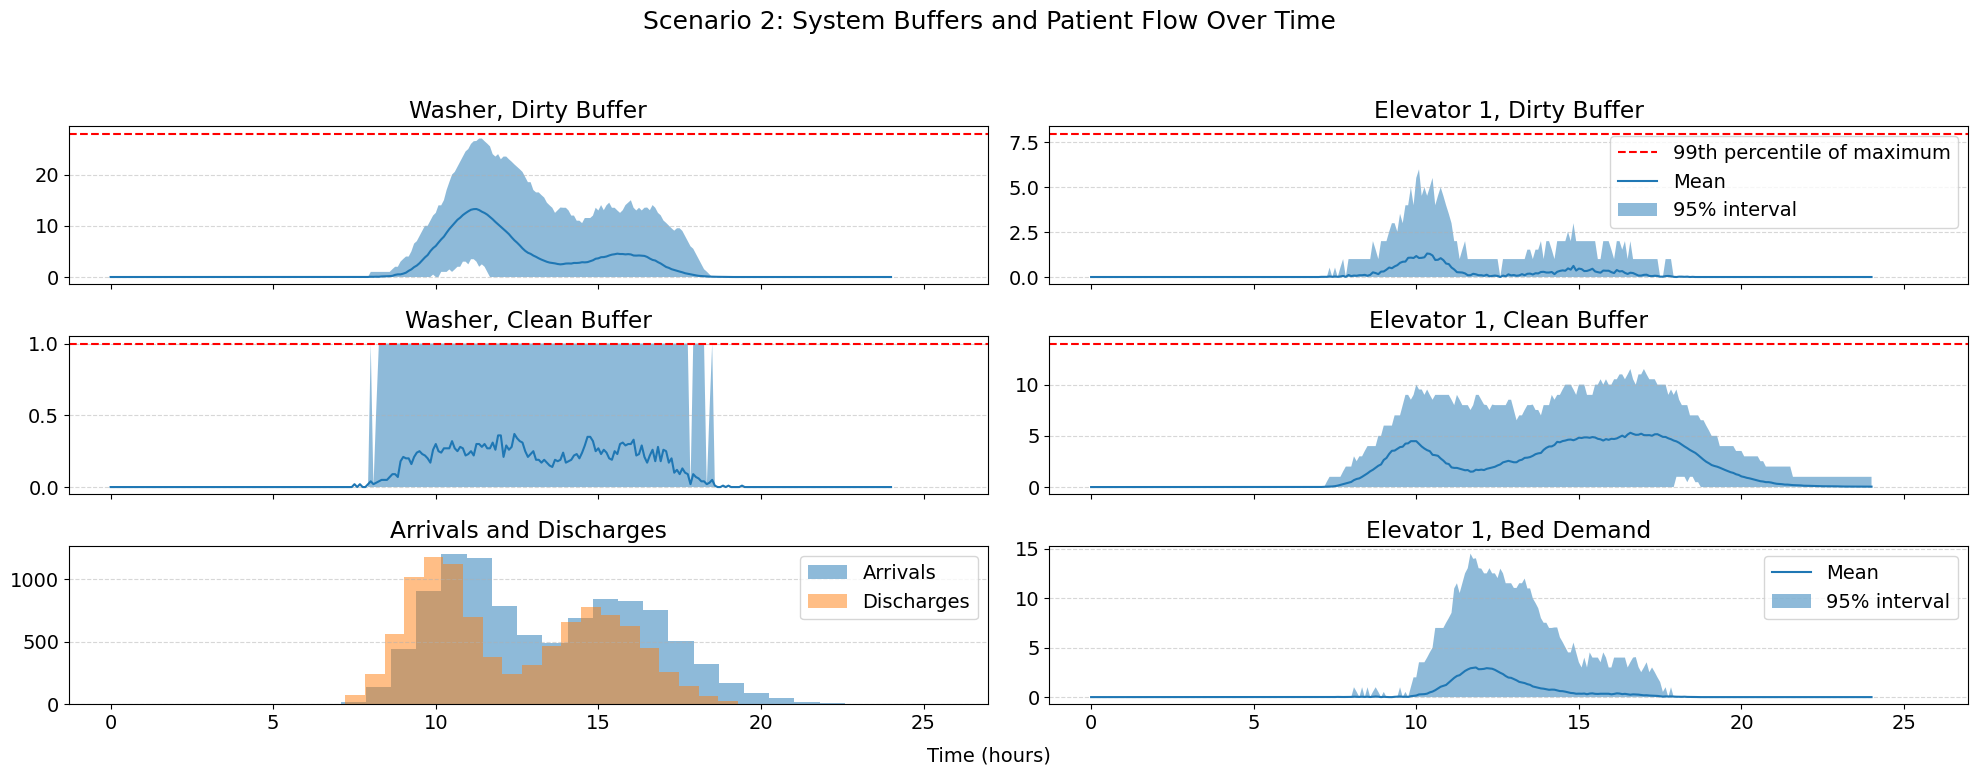

In [19]:
from thinning import make_lambda_scaled, thinning_sampler


def discharge_dist():
    t_max = 24
    n_target = 100  # Approximate expected number of events
    lambda_func, scale = make_lambda_scaled(n_target, t_max)
    t_vals = np.linspace(0, t_max, 1000)
    lambda_vals = lambda_func(t_vals)
    lambda_max = np.max(lambda_vals)
    return thinning_sampler(lambda_func, lambda_max, t_max)

params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.ones(n_elevators) / n_elevators,
    discharge_weights=np.ones(n_elevators) / n_elevators,
    n_elevators=1,
    n_robots=N_ROBOTS,
)

# events, data = simulate_system(params)
buffers, demands, arrival_times, discharge_times, df = simulate_many(params, n_iters=N_ITERS)
plot_result(params, buffers, demands, arrival_times, discharge_times, "scenario2", "Scenario 2")

# Case 3
3 elevators

100%|██████████| 100/100 [00:49<00:00,  2.03it/s]


       Bed Wash  Elevator 1  Elevator 2  Elevator 3
Dirty     29.01         3.0        3.01         3.0
Clean      1.00         5.0        5.01         5.0


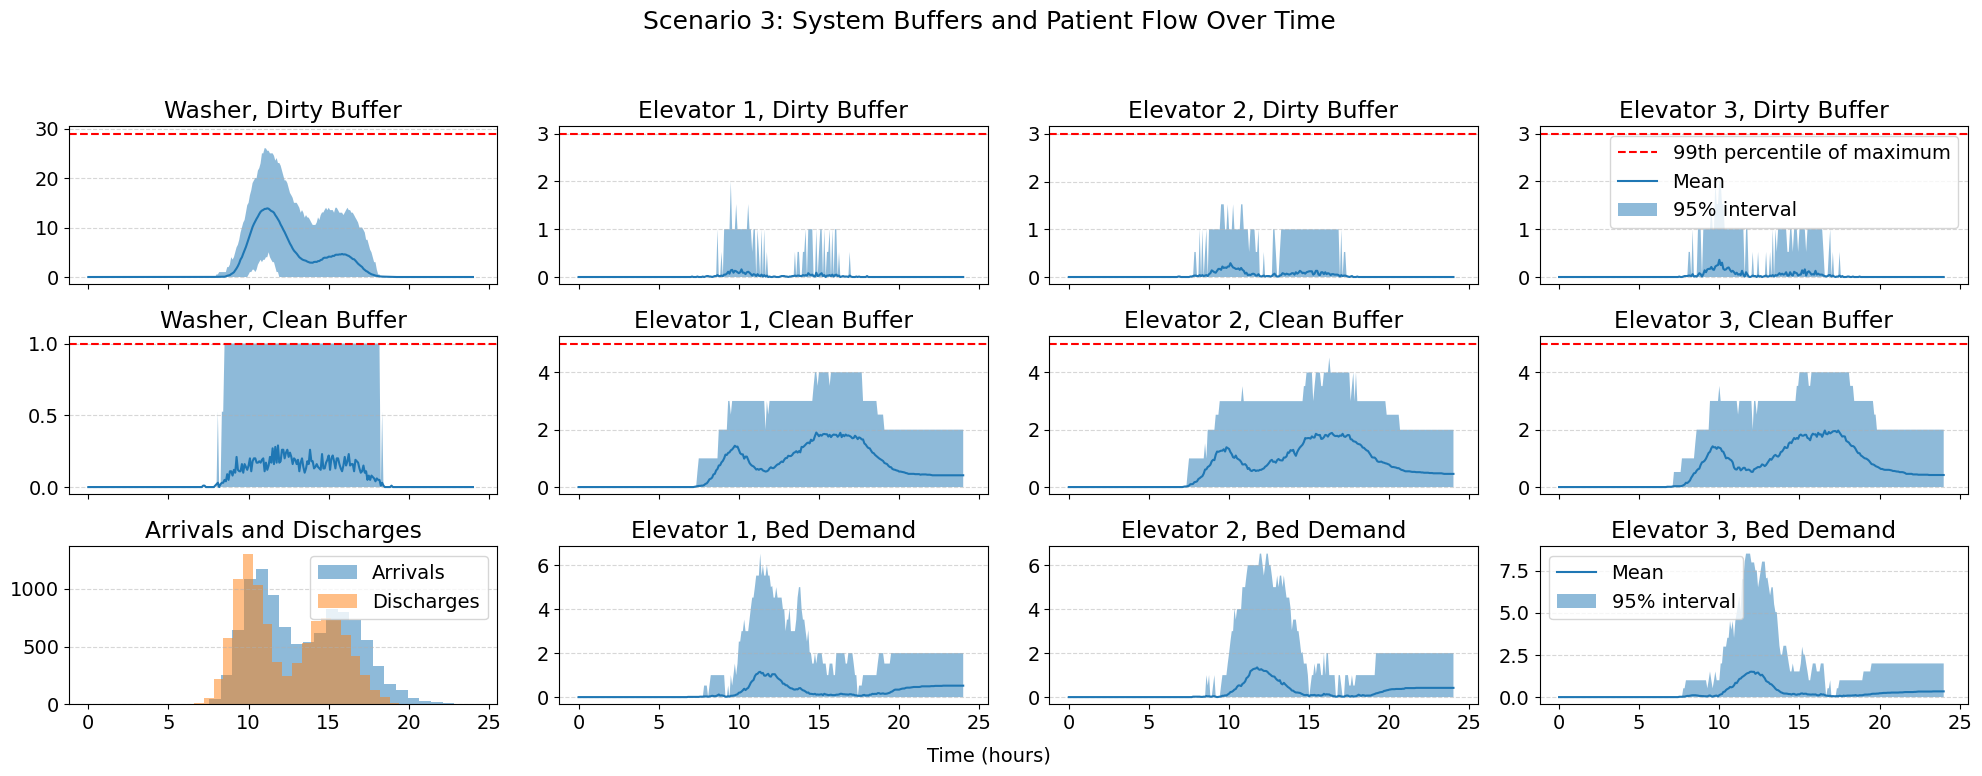

In [20]:
distances = np.array([
    [10, 50, 175, 150],
    [50, 10, 0, 0],
    [175, 0, 10, 0],
    [150, 0, 0, 10],
])

n_elevators = 3

params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.ones(n_elevators) / n_elevators,
    discharge_weights=np.ones(n_elevators) / n_elevators,
    n_elevators=n_elevators,
    n_robots=N_ROBOTS,
)

# events, data = simulate_system(params)
buffers, demands, arrival_times, discharge_times, df = simulate_many(params, n_iters=N_ITERS)
plot_result(params, buffers, demands, arrival_times, discharge_times, "scenario3", "Scenario 3")

# Case 4
Non-uniform arrival and discharge dists

100%|██████████| 100/100 [00:47<00:00,  2.11it/s]


       Bed Wash  Elevator 1  Elevator 2  Elevator 3
Dirty     31.01        2.00         3.0         4.0
Clean      1.00       13.01         2.0         2.0


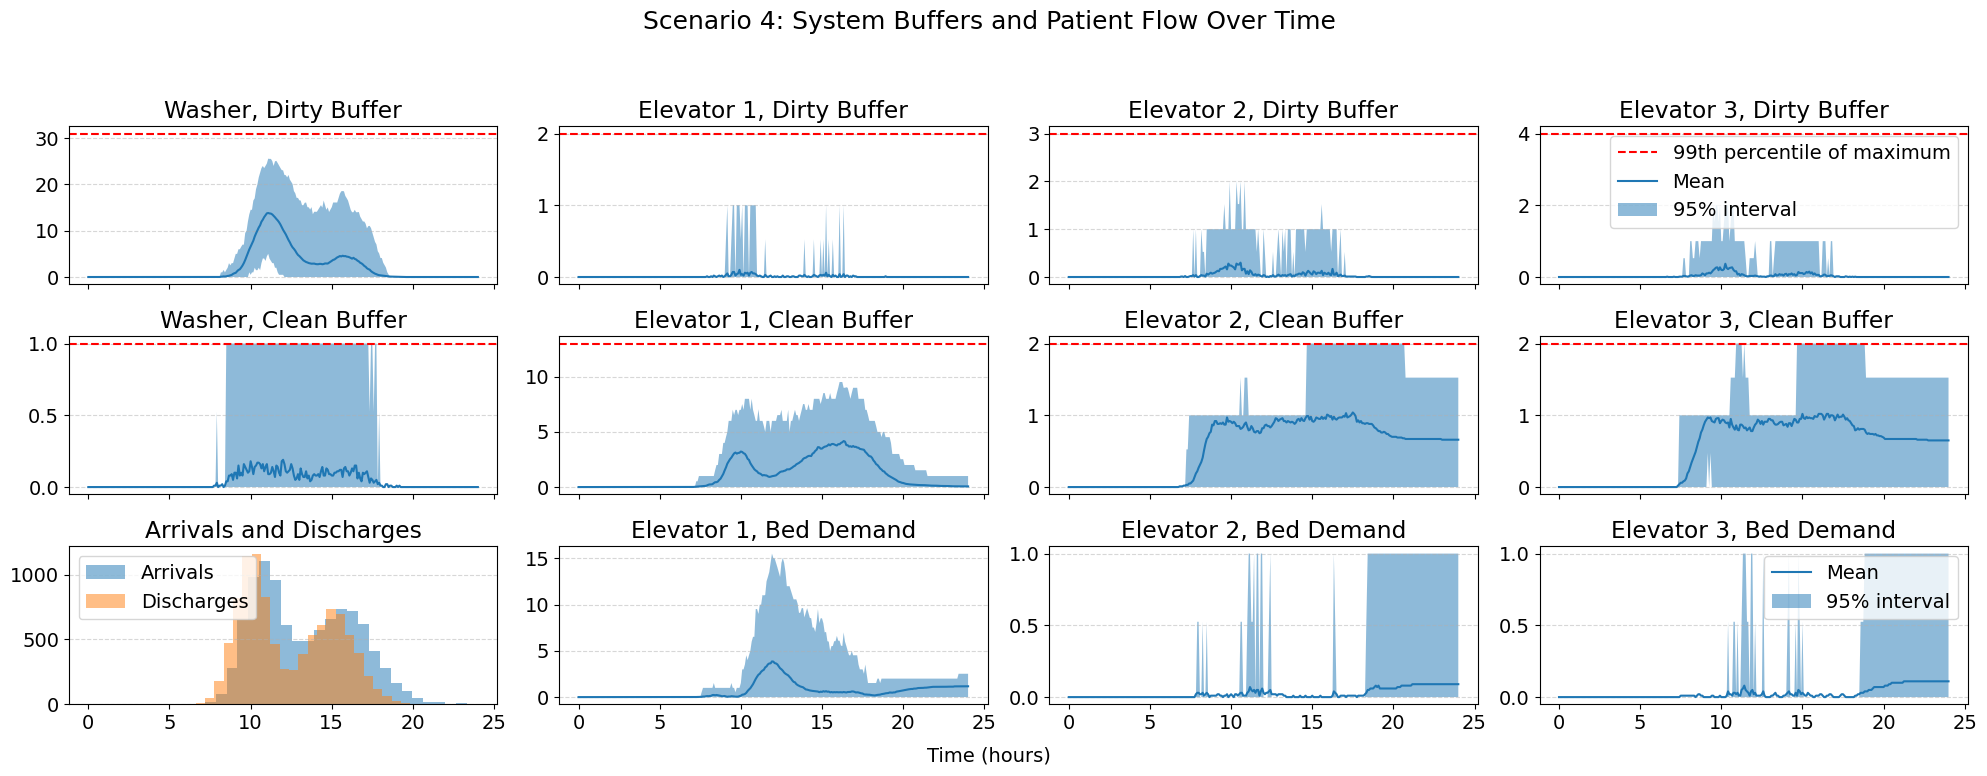

In [21]:
params = SimulationParams(
    discharge_dist,
    service_time_dist,
    transport_time_dist,
    distances,
    arrival_weights=np.array([0.8, 0.1, 0.1]),
    discharge_weights=np.array([0.2, 0.4, 0.4]),
    n_elevators=n_elevators,
    n_robots=N_ROBOTS,
)

# events, data = simulate_system(params)
buffers, demands, arrival_times, discharge_times, df = simulate_many(params, n_iters=N_ITERS)
plot_result(params, buffers, demands, arrival_times, discharge_times, "scenario4", "Scenario 4")